In [1]:
# The code was removed by Watson Studio for sharing.

# (I)  Vegetarian Venues Exploratory Analysis

## (1) Read File: All Vegetarian Restaurants
### Raw_NYC_BLY_Veg_Venues.csv

In [2]:
# The code was removed by Watson Studio for sharing.

In [3]:
df_veg_all= df_veg_all.drop(['Neighborhood Latitude','Neighborhood Longitude'], 1)
df_veg_all.head(1)

,Neighborhood,Id,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Marble Hill,52411ca98bbd75ed0f690c1f,Kingsbridge-Riverdale Farmers' Market,40.879394,-73.907125,Vegetarian / Vegan Restaurant


In [6]:
print ("No of Neighborhoods: {}".format(len(df_veg_all['Neighborhood'].unique())))
print ("No of Unique Vegetarian restaurants: {}".format( len(df_veg_all['Id'].unique())))

No of Neighborhoods: 54
No of Unique Vegetarian restaurants: 261


### Show Existing Vegetarian/Vegan Restaurants by Neighborhoods

In [7]:
#!conda install -c conda-forge folium=0.5.0 --yes
import folium

In [8]:
# Create map around NYC
# NYC latitude and longitude values
latitude = 40.693943
longitude =  -73.985880
nyc_map = folium.Map(location=[latitude, longitude], zoom_start=13)

In [9]:
# instantiate a feature group for the restaurants in the dataframe
venues = folium.map.FeatureGroup()


for lat, lng, in zip(df_veg_all["Venue Latitude"], df_veg_all["Venue Longitude"]):
    venues.add_child(
        folium.features.CircleMarker(
            [lat, lng],
            radius=5, # define how big you want the circle markers to be
            color='yellow',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6
        )
    )

# add incidents to map
nyc_map.add_child(venues)

## (2) Read File:  Vegetarian Restaurants Details
### Raw_Veg_Det.csv

In [10]:

body = client_28f59a8b95244afd942c879f95ed4145.get_object(Bucket='battleneighborhood-donotdelete-pr-daicfvssjqzcx5',Key='Raw_Veg_Det.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_veg_det = pd.read_csv(body)



In [11]:
# Join the details data ( price, rating) by ID
df_veg_all=pd.merge (df_veg_all,df_veg_det, on='Id', how='left')

## (3) Visualize  Vegetarian Restaurants by Location

In [12]:
df_veg_count = df_veg_all.groupby(['Neighborhood']).count()["Venue"].sort_values(ascending=False)
df_veg_count.head(5)

Neighborhood
Flatiron             24
Greenwich Village    23
East Village         21
Noho                 19
Little Italy         16
Name: Venue, dtype: int64

## (4)  Visualize Popular Vegetarian Restaurants
We consider restaurants with rating higher than 7.5 as successful restaurants

In [13]:
# Will not consider restaurant with No Rating, so default it as 0.0
df_veg_all['Rating'] = df_veg_all['Rating'].replace("None", "0")
df_veg_all['Rating'] = df_veg_all['Rating'].astype(float).fillna(0.0)
good_veg = df_veg_all[df_veg_all['Rating'] > 7.5]

In [14]:
# Count good vegetarian restuarnts by  neighborhood
good_veg_count = good_veg.groupby(['Neighborhood']).count()["Venue"].sort_values(ascending=False)
good_veg_count.head(3)

Neighborhood
Flatiron             13
East Village         11
Greenwich Village    10
Name: Venue, dtype: int64

## (5) Visualize Venues by Price

In [15]:
series_price_count = df_veg_all.groupby(['Price'], axis=0).count()['Venue'].sort_values(ascending= False)
df_price_count = pd.DataFrame(series_price_count)
df_price_count

,Venue
Price,
Moderate,223
Cheap,60
Expensive,15
None,4
Very Expensive,1


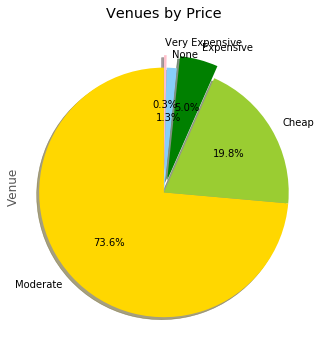

In [16]:
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot') # optional: for ggplot-like style
# Pie chart of percentage of each

colors_list = ['gold', 'yellowgreen',  'green', 'lightskyblue', 'pink']
explode_list = [0, 0, 0.1, 0, 0.1]

df_price_count['Venue'].plot(kind='pie',
                    figsize=(5, 6),
                    autopct='%1.1f%%', # add in percentages
                    startangle=90,     # start angle 90° (Africa)
                    shadow=True,       # add shadow 
                    colors=colors_list,
                    explode=explode_list # 
                    )


plt.title('Venues by Price')
plt.axis('equal') # Sets the pie chart to look like a circle.
plt.show()

# Pie chart of percentage of each ( only for popular resturants) 

##  (5) Visualize by Venue Category

In [17]:
df_cat_count = df_veg_all.groupby('Venue Category', axis=0).count()['Venue'].sort_values(ascending = False)
df_cat_count.head(5)

Venue Category
Vegetarian / Vegan Restaurant    210
Juice Bar                         20
Salad Place                       11
Food Truck                         5
Bakery                             5
Name: Venue, dtype: int64

## (6) Visualize Characteristics of Successful Neighborhood

In [18]:
def investigate_neighborhood(name):
   veg_this_neighborhood =  df_veg_all[df_veg_all['Neighborhood'] == name] 
   print ("Neighborhood: {}".format(name))
   print ("No of restaurants: {}".format (veg_this_neighborhood.shape[0]))
   series_price_count = veg_this_neighborhood.groupby('Price', axis=0).count()['Venue'].sort_values(ascending= False)
   df_price_count = pd.DataFrame(series_price_count)

   df_price_count['Venue'].plot(kind='pie',
                    figsize=(5, 6),
                    autopct='%1.1f%%', # add in percentages
                    startangle=90,     # start angle 90° (Africa)
                    shadow=True,       # add shadow 
                    #colors=colors_list,
                    #explode=explode_list # 
                    )

   plt.title('Venues by Price')
   plt.axis('equal') # Sets the pie chart to look like a circle.
   plt.show()

   df_cat_count = veg_this_neighborhood.groupby('Venue Category', axis=0).count()['Venue'].sort_values(ascending = False)
   print(df_cat_count.head(5))
   return

Neighborhood: East Village
No of restaurants: 21


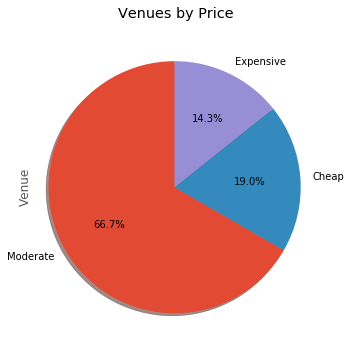

Venue Category
Vegetarian / Vegan Restaurant    17
Mac & Cheese Joint                1
Indian Restaurant                 1
Donut Shop                        1
Cocktail Bar                      1
Name: Venue, dtype: int64


In [19]:
investigate_neighborhood ("East Village")

In [20]:
#investigate_neighborhood ("Flatiron")

In [21]:
#investigate_neighborhood ("Greenwich Village")

# (II) Clustering

##   (1) Read from file:  All Food Venue by Neighborhood
###  Read_NYC_BLY_Food_Venues.csv

In [22]:
# The code was removed by Watson Studio for sharing.

In [23]:
print('There are {} uniques categories.'.format(len(df_all_venues['Venue Category'].unique())))
print('There are {} uniques neighborghood.'.format(len(df_all_venues['Neighborhood'].unique())))

There are 127 uniques categories.
There are 61 uniques neighborghood.


In [24]:
# one hot encoding
manhattan_onehot = pd.get_dummies(df_all_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
manhattan_onehot['Neighborhood'] = df_all_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [manhattan_onehot.columns[-1]] + list(manhattan_onehot.columns[:-1])
manhattan_onehot = manhattan_onehot[fixed_columns]

manhattan_onehot.shape

(4018, 128)

In [25]:
# Take the mean of all venues count by neighborhood
nyc_grouped = manhattan_onehot.groupby('Neighborhood').mean().reset_index()

##  (2)  Use  Venues to Clustering Neighborhoods
### Determine optimal k using Elbow Method

In [26]:
# import k-means from clustering stage
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
from scipy.spatial.distance import cdist
import numpy as np


nyc_grouped = manhattan_onehot.groupby('Neighborhood').mean().reset_index()
manhattan_grouped_clustering = nyc_grouped.drop('Neighborhood', 1)


# run k-means clustering
Ks = range(1, 16)
distortions = []
for i in Ks:
    print ("Running cluster {} ".format(i))
    km = KMeans(n_clusters=i).fit(manhattan_grouped_clustering)
    score = abs( km.score(manhattan_grouped_clustering))
    distortions.append(score)

Running cluster 1 
Running cluster 2 
Running cluster 3 
Running cluster 4 
Running cluster 5 
Running cluster 6 
Running cluster 7 
Running cluster 8 
Running cluster 9 
Running cluster 10 
Running cluster 11 
Running cluster 12 
Running cluster 13 
Running cluster 14 
Running cluster 15 


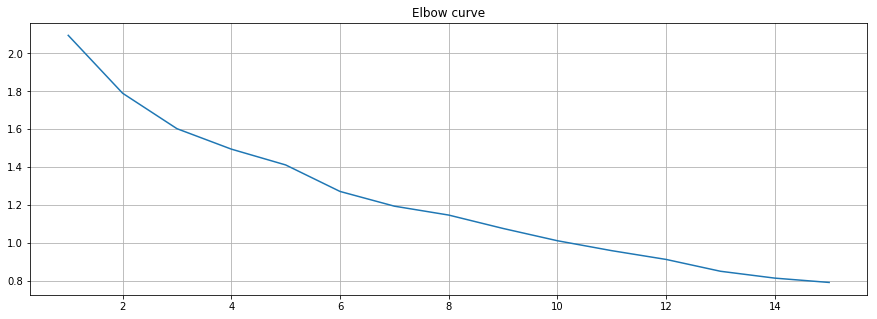

In [17]:
# Using Elbow curve, try to see what is the best K to use
fig = plt.figure(figsize=(15, 5))
plt.plot(range(1, 16), distortions)
plt.grid(True)
plt.title('Elbow curve')
plt.show()

## (3) Run Clustering using best K

In [27]:
kclusters = 15
nyc_grouped = manhattan_onehot.groupby('Neighborhood').mean().reset_index()
manhattan_grouped_clustering = nyc_grouped.drop('Neighborhood', 1)
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(manhattan_grouped_clustering)
# Add clustering labels to original df 
nyc_grouped.insert(0, 'Cluster Labels', kmeans.labels_)
nyc_grouped.sort_values("Cluster Labels", inplace=True)

## (4)  Add 10 Most Common Venue Info to each cluster

In [28]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[2:]
    #print (row_categories)
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [29]:
num_top_venues = 10
# create columns according to number of top venues
columns = ['Neighborhood', 'Cluster']

indicators = ['st', 'nd', 'rd']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = nyc_grouped['Neighborhood']
neighborhoods_venues_sorted['Cluster'] = nyc_grouped['Cluster Labels']

for ind in np.arange(nyc_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 2:] = return_most_common_venues(nyc_grouped.iloc[ind, :], num_top_venues)
    
neighborhoods_venues_sorted.sort_values(by="Cluster", ascending=False)
neighborhoods_venues_sorted.head(2)

,Neighborhood,Cluster,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
31,Little Italy,0,Italian Restaurant,Bakery,Café,Chinese Restaurant,Mediterranean Restaurant,Sandwich Place,Thai Restaurant,French Restaurant,Seafood Restaurant,Japanese Restaurant
57,West Village,0,Italian Restaurant,American Restaurant,New American Restaurant,Gastropub,French Restaurant,Mexican Restaurant,Japanese Restaurant,Seafood Restaurant,Pizza Place,Café


## (6) Save File with Cluster and top 10 Venues for each Neighborhood
###  Result_NYC_FoodClusterTopVenues.csv

In [ ]:
project.save_data(data= neighborhoods_venues_sorted.to_csv(index=False),file_name='Result_NYC_FoodClusterTopVenue.csv',overwrite=True)

# (III) Visualization of Results

## (1)  Determine neighborhoods in same cluster that has successful Vegetarian restaurant

In [30]:
# Or we can read from Results file we saved 
df_cluster = neighborhoods_venues_sorted

In [31]:
# Neighborhoods with same cluster

successNeighborhood = ['East Village', 'Flatiron', 'Greenwich Village']
df_filtered = df_cluster[df_cluster["Neighborhood"].isin(successNeighborhood)]

df_group = df_filtered.groupby(['Neighborhood','Cluster']).sum().reset_index()

df_group[['Neighborhood', 'Cluster']]

,Neighborhood,Cluster
0,East Village,3
1,Flatiron,0
2,Greenwich Village,0


In [32]:
# Find Neighborhoods in these 2 cluster
df_filtered = df_cluster[df_cluster['Cluster'].isin(df_group['Cluster'])]
df_other_neighborhood = df_filtered.groupby(['Neighborhood','Cluster']).sum().reset_index()
df_potential = df_other_neighborhood[['Neighborhood', 'Cluster']].sort_values('Cluster')
df_potential.head(1)

,Neighborhood,Cluster
8,Little Italy,0


In [33]:
# Add latitude of df_potential by reading file Raw_NYC_BLY_Location/csv
body = client_28f59a8b95244afd942c879f95ed4145.get_object(Bucket='battleneighborhood-donotdelete-pr-daicfvssjqzcx5',Key='Raw_NYC_BLY_Location.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )


df_loc = pd.read_csv(body)

In [34]:
df_to_graph1 = df_potential.merge(df_loc, on='Neighborhood', how='left')

In [35]:
# Count no of veg in each neighborhood by eading filfe Raw_NYC_BLY_Veg_Venues.csv
body = client_28f59a8b95244afd942c879f95ed4145.get_object(Bucket='battleneighborhood-donotdelete-pr-daicfvssjqzcx5',Key='Raw_NYC_BLY_Veg_Venues.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_veg_all = pd.read_csv(body)

In [36]:
df_count_veg = pd.DataFrame(df_veg_all.groupby('Neighborhood').count()['Venue'])
    
df_count_veg.rename(columns={'Venue':'Count'}, inplace=True)
df_count_veg=df_count_veg.reset_index()

In [37]:
df_to_graph = df_to_graph1.merge(df_count_veg ,on='Neighborhood', how='left')

In [38]:
df_to_graph['Count'].fillna(0, inplace=True)

In [39]:
# Remove potential candidate based on a few criteria
df_inCluster = df_to_graph[df_to_graph['Cluster'].isin([0,3])]
# Remove neighborhoods that currently do no have any veg restaurants
df_inCluster= df_inCluster[df_inCluster['Count'] > 0]
# Remove neighborhoods we eliminated during our discussion
df_inCluster= df_inCluster[~df_inCluster['Neighborhood'].isin(['Battery Park City','Chelsea','West Village', 'Chinatown','Upper East Side'])]

In [40]:
df_success = df_inCluster[df_inCluster['Neighborhood'].isin(successNeighborhood)]
df_potential =df_inCluster[~df_inCluster['Neighborhood'].isin(successNeighborhood)]

In [41]:
df_cluster0=df_inCluster[df_inCluster['Cluster'] == 0]
df_cluster3=df_inCluster[df_inCluster['Cluster'] == 3]

In [42]:
def getMarker( df_thisCluster , df_success):

    
    incidents = folium.map.FeatureGroup()  

    longitudes = list(df_thisCluster["Longitude"])
    latitudes = list(df_thisCluster["Latitude"])
    labels = list(df_thisCluster["Neighborhood"])
    clusters = list(df_thisCluster["Cluster"])
    
    
    for lat, lng, label, cluster in zip(latitudes, longitudes, labels, clusters):
    
         if (cluster == 0):
            thisColor = 'blue'
         else:
            thisColor = 'red'
         incidents.add_child(
            folium.features.CircleMarker(
            [lat, lng],
            radius=10, # define how big you want the circle markers to be
            color='yellow',
            fill=True,
            fill_color=thisColor,
            fill_opacity=0.6,
            popup=label
            )
        )
        
      
    longitudes = list(df_success["Longitude"])
    latitudes = list(df_success["Latitude"])
    labels = list(df_success["Neighborhood"])
    clusters = list(df_success["Cluster"])
    
    for lat, lng, label, cluster in zip(latitudes, longitudes, labels, clusters):
         if (cluster == 0):
            thisColor = 'purple'
         else:
            thisColor = 'orange'
         incidents.add_child(
            folium.features.CircleMarker(
            [lat, lng],
            radius=10, # define how big you want the circle markers to be
            color='black',
            fill=True,
            fill_color=thisColor,
            fill_opacity=0.6,
        
            )
         )
   
    return  incidents


## (2) Visualize Recommended Neighborhood on Folium Map

In [43]:
from folium.features import DivIcon
# Create map around NYC
# NYC latitude and longitude values
latitude = 40.78
longitude =  -73.97
f = folium.Figure(width=700, height=700)
nyc_map = folium.Map(location=[latitude, longitude], zoom_start=12)
nyc_map.add_to(f)
featureGrp= getMarker( df_cluster3, df_success)
df_inCluster=df_cluster3


latitudes = list(df_inCluster['Latitude'])
longitudes = list(df_inCluster['Longitude'])
labels = list(df_inCluster['Neighborhood'])
counts = list(df_inCluster["Count"])
for lat, lng, label, count in zip(latitudes, longitudes, labels, counts):
    thislabel =  "{} {:.0f} ".format(label,  count)
    #folium.Marker([lat, lng], popup=label, icon=folium.Icon(color='green')).add_to(nyc_map)     
    folium.map.Marker([lat, lng],
        icon=DivIcon(
        icon_size=(150,36),
        icon_anchor=(0,0),
        html='<div style="font-size: 12pt">%s</div>' % thislabel,
        )
    ).add_to(nyc_map)
 
nyc_map.add_child(featureGrp)